# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

L'objet de l'étude était de prévoir au niveau mondial quelle serait l'énergie de demain.
Nous avons récupéré sur les trente dernières années la consommation mondiale par pays et par énergie. 
Nous avons voulu être le plus exhaustif possible en traitant les énergies suivantes :
* Pétrole
* Gaz
* Charbon
* Nucléaire
* Hydraulique
* Solaire
* Energie renouvelable
* Vent

Nous avons travaillé sur le jeu de données fourni par BP, il s'agit du BP Statistical Review 2018 qui agrège les données depuis 1965.
Nous avons également travaillé sur d'autres jeux de données nous permettant d'obtenir la consommation mondiale d'énergie par secteur d'activité, néanmoins la mauvaise qualité de ces données et le peu de temps ne nous a pas permis de les exploiter.

## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
sns.set()

In [2]:
path = '\\'.join(os.getcwd().split("\\")[:-1])

urban_population = pd.read_csv(f'{path}\\data\\Urban-population-by-country.csv', skiprows=4)
population_growth = pd.read_csv(f'{path}\\data\\Population-growth-by-country.csv', skiprows=4)
population = pd.read_csv(f'{path}\\data\\Population-by-country.csv', skiprows=4)
access_electricity = pd.read_csv(f'{path}\\data\\Access-to-electricity-by-country.csv', skiprows=4)
nitrous_oxyd_emission = pd.read_csv(f'{path}\\data\\Nitrous-oxyd-emission.csv',skiprows=4)
gdp = pd.read_csv(f'{path}\\data\\gdp.csv',skiprows=4)
methan_emission = pd.read_csv(f'{path}\\data\\Methan-emission-by-country.csv',skiprows=4)
co2_emission = pd.read_csv(f'{path}\\data\\emission_CO2.csv',skiprows=4)

In [3]:
def clean_all_df(df, value):
    df_copy = df.copy()
    df_copy = df_copy.drop(df.columns[len(df.columns)-1], axis=1)
    df_copy = df_copy.drop(columns=['Indicator Code','Indicator Name','2019','Country Code'])
    df_copy = df_copy.fillna(method='bfill')
    df_copy = df_copy.T
    df_copy = df_copy.reset_index()
    header = np.array(df_copy.iloc[0])
    header[0] = 'Date'
    df_copy = df_copy[1:]
    df_copy.columns = header
    df_copy = df_copy.melt(id_vars=['Date'], var_name='Country', value_name=value)
    df_copy = df_copy.sort_values(value,ascending=False)
    return df_copy

def get_region(df, global_region):
    df_region = df[df['Country'].isin(global_region)]
    return df_region

def merge_df(df_list):
    df_demographic = df_list[0]
    for df in df_list[1::]:
        df_demographic = pd.merge(df_demographic, df, on=['Date', 'Country'])
    return df_demographic

def plot_time_serie(df, y, title):
    fig = px.line(df, x='Date', y=y,color='Country',title=title)
    fig.show()

In [4]:
urban_population_cleaned = clean_all_df(urban_population, 'Urban Population')
population_growth_cleaned = clean_all_df(population_growth, 'Population Growth')
population_cleaned = clean_all_df(population, 'Population')
access_electricity_cleaned = clean_all_df(access_electricity, 'Access to Electricity')
gdp_cleaned = clean_all_df(gdp, 'GDP in $')
nitrous_oxyd_emission_cleaned = clean_all_df(nitrous_oxyd_emission, 'Nitrous Oxyd Emission')
methan_emission_cleaned = clean_all_df(methan_emission, 'Methan Oxyd Emission')
co2_emission_cleaned = clean_all_df(co2_emission, 'CO2 Emission')

In [5]:
df_list = [urban_population_cleaned, population_growth_cleaned, population_cleaned,
           access_electricity_cleaned, gdp_cleaned, nitrous_oxyd_emission_cleaned,
          methan_emission_cleaned, co2_emission_cleaned]

In [6]:
df_demographic = merge_df(df_list)

In [7]:
global_region = ['World','North America', 'Euro area', 'Russian Federation', 'Sub-Saharan Africa',
                 'Middle East & North Africa', 'East Asia & Pacific', 'Latin America & Caribbean']

In [8]:
df_demographic_grouped = get_region(df_demographic, global_region)

In [9]:
regions = {'East Asia & Pacific':'Asia Pacific', 'Latin America & Caribbean':'Latin America',
       'Sub-Saharan Africa':'Africa', 'North America':'North America',
       'Middle East & North Africa':'Middle East', 'Euro area':'Europe', 'Russian Federation':'Russia'}

In [10]:
df_demographic_grouped.loc[:,'Country'] = df_demographic_grouped.loc[:,'Country'].replace(regions)

C:\Users\MS_BGD\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df_demographic_grouped

Date      Country Urban Population Population Growth   Population  \
0     2018        World      4.19636e+09           1.10877  7.59427e+09   
1     2017        World      4.11667e+09           1.14309  7.51099e+09   
2     2016        World      4.03654e+09           1.16551   7.4261e+09   
3     2015        World      3.95655e+09           1.17004  7.34055e+09   
4     2014        World      3.87766e+09           1.18104  7.25565e+09   
...    ...          ...              ...               ...          ...   
3170  1963       Africa      3.80988e+07           2.42386  2.43893e+08   
3243  1960  Middle East       3.6736e+07           3.11851  1.05203e+08   
3255  1962       Africa      3.64252e+07           2.38841  2.38122e+08   
3306  1961       Africa      3.48633e+07           2.34729  2.32567e+08   
3365  1960       Africa      3.33808e+07           1.22989  2.27233e+08   

     Access to Electricity     GDP in $ Nitrous Oxyd Emission  \
0                      NaN  8.58044e+13                   NaN   
1                  88.8486  8.08913e+13                   NaN   
2                  87.9769  7.61028e+13                   NaN   
3                  86.7787  7.50031e+13                   NaN   
4                  85.5879  7.92961e+13                   NaN   
...                    ...          ...                   ...   
3170                   NaN   3.8685e+10                   NaN   
3243                   NaN    1.304e+10                   NaN   
3255                   NaN  3.37602e+10                   NaN   
3306                   NaN  3.11574e+10                   NaN   
3365                   NaN  2.99737e+10                   NaN   

     Methan Oxyd Emission CO2 Emission  
0                     NaN          NaN  
1                     NaN          NaN  
2                     NaN          NaN  
3                     NaN          NaN  
4                     NaN  3.61383e+07  
...                   ...          ...  
3170                  NaN       143107  
3243                  NaN       102253  
3255                  NaN       136504  
3306                  NaN       131879  
3365                  NaN       126087  

[472 rows x 10 columns]

In [12]:
df_demographic_grouped.to_csv(f'{path}\\demographic_grouped.csv',index=False)

In [13]:
plots = {'Population': "Evolution de la population mondiale", 
         'Urban Population': 'Evolution de la population mondiale urbaine', 
         'GDP in $': 'Evolution du GDP in $',
         'Nitrous Oxyd Emission': "Evolution des émissions de protoxyde d'azote", 
         'Methan Oxyd Emission': "Evolution des émissions de méthane", 
         'CO2 Emission': "Evolution des émissions de CO2"}

In [14]:
for key in plots.keys():
    plot_time_serie(df_demographic_grouped, key, plots.get(key))

In [15]:
final_df = pd.read_csv("C:\\Users\\Farid El Attaoui\\Documents\\MS Big Data\\P1\\INFMDI721_Kit_Data_Sciences\\Hackaton\\HackatonMDI720\\Co2_predicted.csv")
final_df['GDP per capita']= final_df['GDP in $']/final_df['Population']


In [16]:
fig = px.scatter(final_df[final_df['Country']!='World'], x='GDP per capita', y="CO2 Emission",color='Country',title='Emmission de CO2 en fonction du GDP per capita')
fig.show()

In [17]:
px.histogram(final_df[final_df['Country']!='World'],x="Energy",y="Production",histfunc='sum',color='Date')


## Open datas 


In [18]:
dataPath ='\\'.join(os.getcwd().split("\\")[:-1])+"\\data\\"

### Oil production

In [19]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [20]:
def clean (df, unite) :
    indexUSSR = np.where(df[unite]=="USSR")[0][0]
    indexRussie = np.where(df[unite]=="Russian Federation")[0][0]
    df.iloc[indexUSSR] = df.iloc[indexUSSR].fillna(0) + df.iloc[indexRussie].fillna(0)
    df = df.dropna(thresh= len(df.columns)-20).fillna(0)
    return df

def separate_total(df, unite) :
    df_tot = pd.DataFrame(df[df[unite].str.contains("Total")]).set_index(unite)
    df = df[df[unite].str.contains("Total") == False].set_index(unite)
    return df_tot, df

def print_df(df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,pays in enumerate(df.index) :   
        plt.plot(df.columns.values[:-5], df.iloc[k][:-5], label=f"{pays}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()
    
def set_name_df(df,name) :
    df.name = name
    return df

In [21]:
unite = "Million tonnes"
oil_production = clean(oil_production,unite)
oil_production_total, oil_production = separate_total(oil_production,unite)
oil_production_total, oil_production = set_name_df(oil_production_total, "Total oil"), set_name_df(oil_production_total, "Oil")

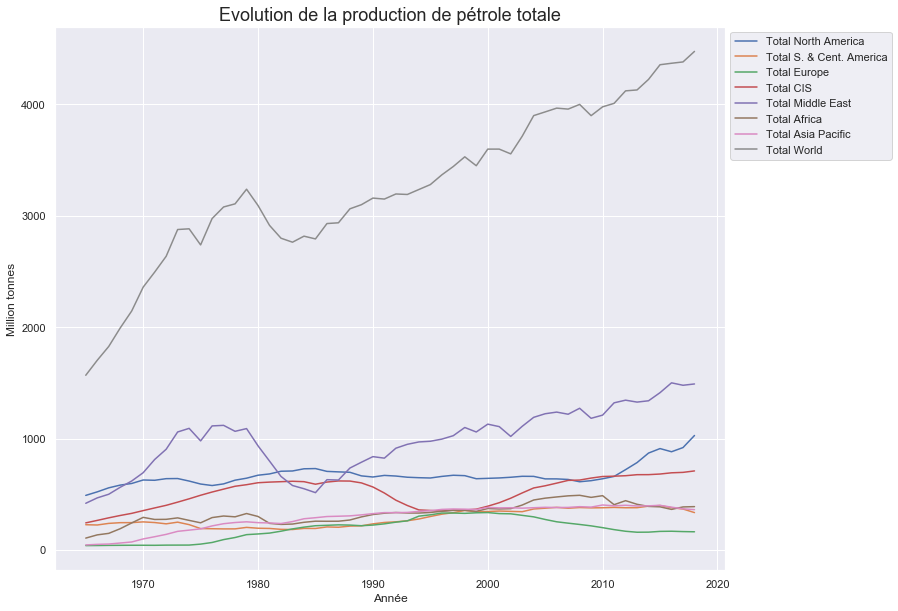

In [22]:
print_df(oil_production_total, "Evolution de la production de pétrole totale", unite)

### Gaz production

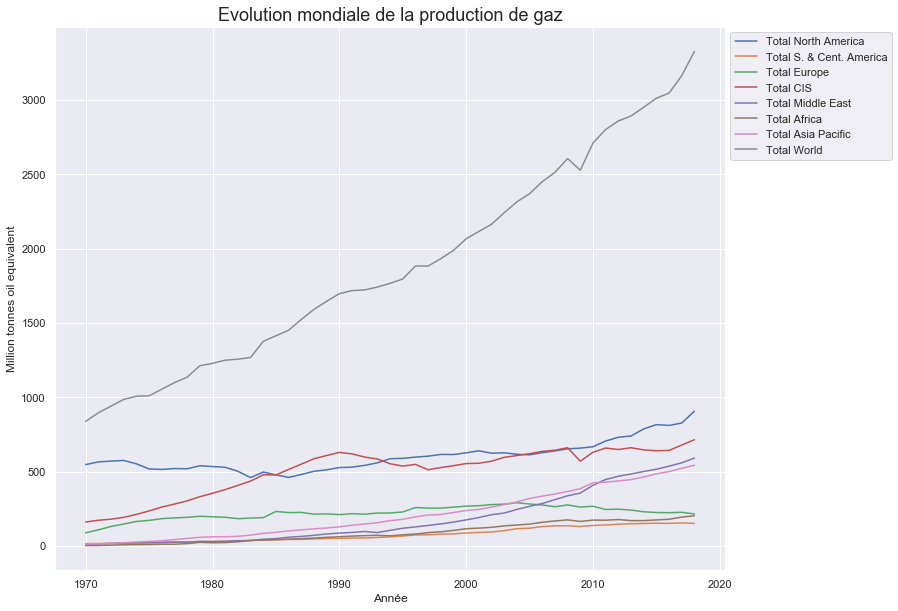

In [23]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 5, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production, unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)
gaz_production_total, gaz_production = set_name_df(gaz_production_total, "Total gaz"), set_name_df(gaz_production_total, "gaz")
print_df(gaz_production_total, "Evolution mondiale de la production de gaz", unite)

### Coal production 

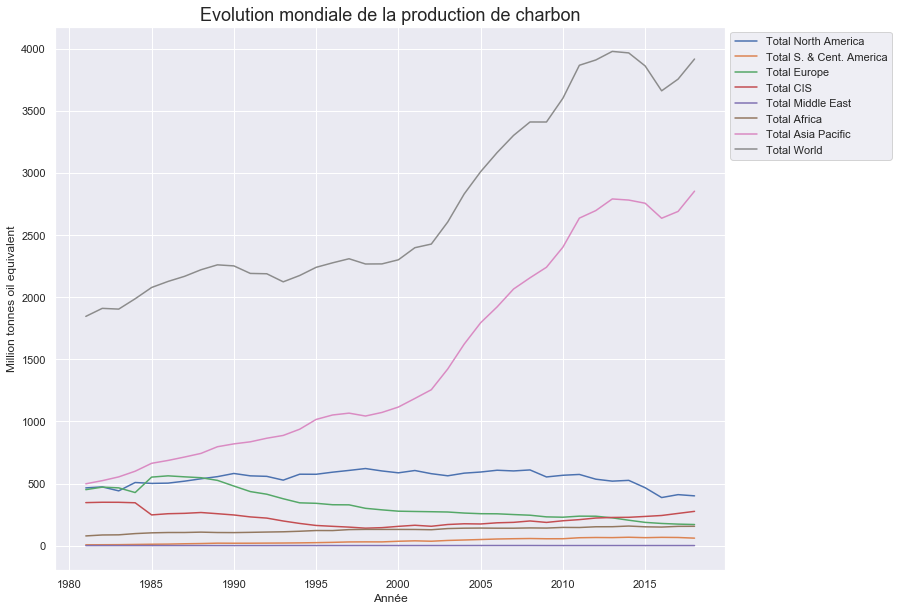

In [24]:
coal_production = pd.read_excel(dataPath+"data_production.xlsx", 7, header = 2)
unite = "Million tonnes oil equivalent"
coal_production = clean(coal_production,unite)
coal_production_total, coal_production = separate_total(coal_production, unite)
coal_production_total, coal_production = set_name_df(coal_production_total, "Total coal"), set_name_df(coal_production_total, "coal")
print_df(coal_production_total, "Evolution mondiale de la production de charbon", unite)

### Nuclear : 

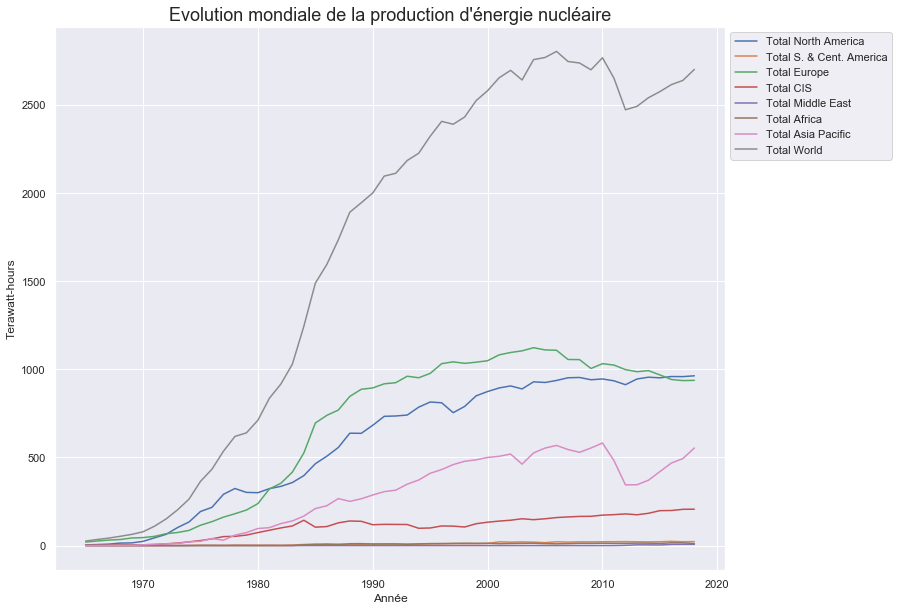

In [25]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 8, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)
nuclear_production_total, nuclear_production = set_name_df(nuclear_production_total, "Total nuclear"), set_name_df(nuclear_production_total, "nuclear")
print_df(nuclear_production_total, "Evolution mondiale de la production d'énergie nucléaire", unite)

### Hydro-generation 

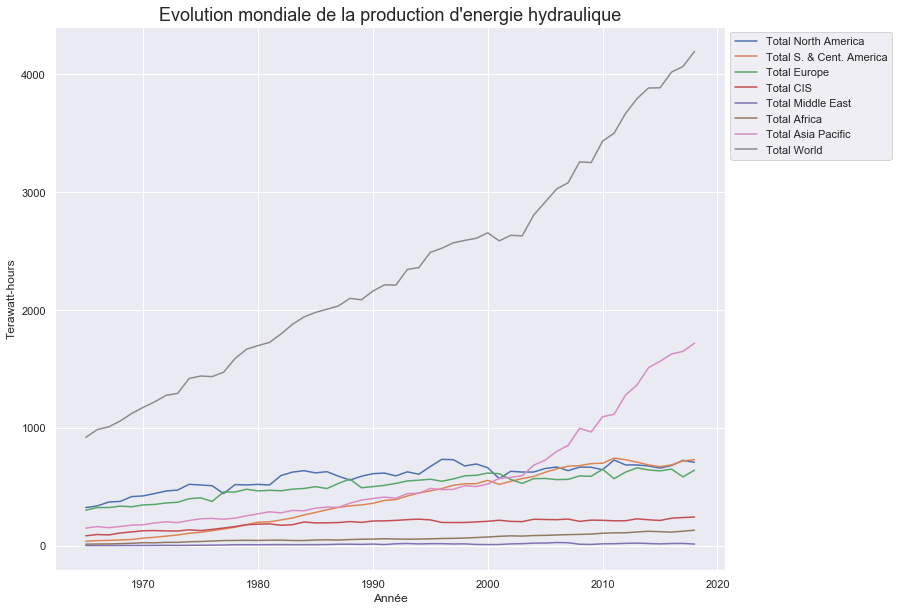

In [26]:
hydro_production = pd.read_excel(dataPath+"data_production.xlsx", 9, header = 2)
unite = "Terawatt-hours"
hydro_production = clean(hydro_production,unite)
hydro_production_total, hydro_production = separate_total(hydro_production, unite)
hydro_production_total, hydro_production = set_name_df(hydro_production_total, "Total hydro"), set_name_df(hydro_production_total, "hydro")
print_df(hydro_production_total, "Evolution mondiale de la production d'energie hydraulique", unite)

### Energie renouvelable : 


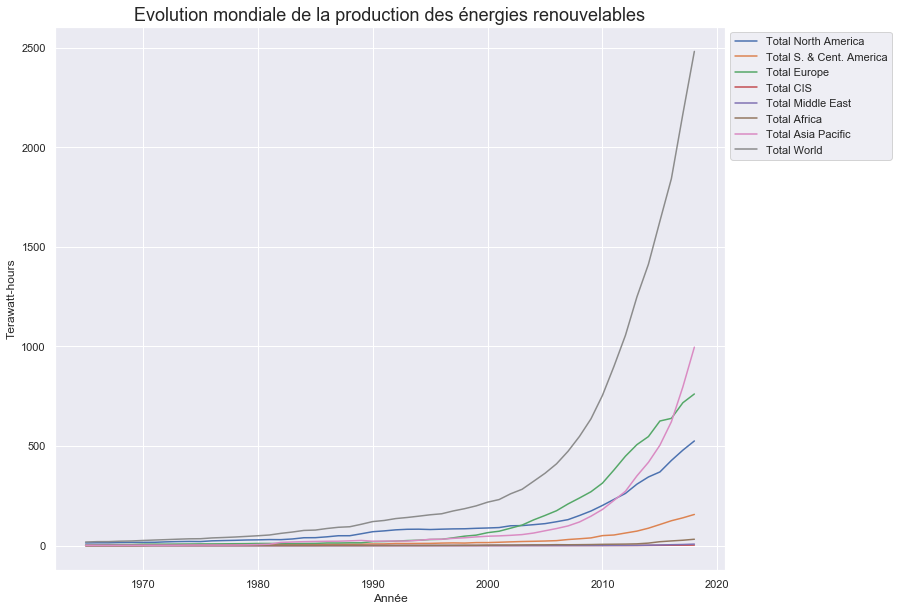

In [27]:
renewable_production = pd.read_excel(dataPath+"data_production.xlsx", 10, header = 2)
unite = "Terawatt-hours"
renewable_production = clean(renewable_production,unite)
renewable_production_total, renewable_production = separate_total(renewable_production, unite)
renewable_production_total, renewable_production = set_name_df(renewable_production_total, "Total renewable"), set_name_df(renewable_production_total, "renewable")
print_df(renewable_production_total, "Evolution mondiale de la production des énergies renouvelables", unite)

### Solaire : 


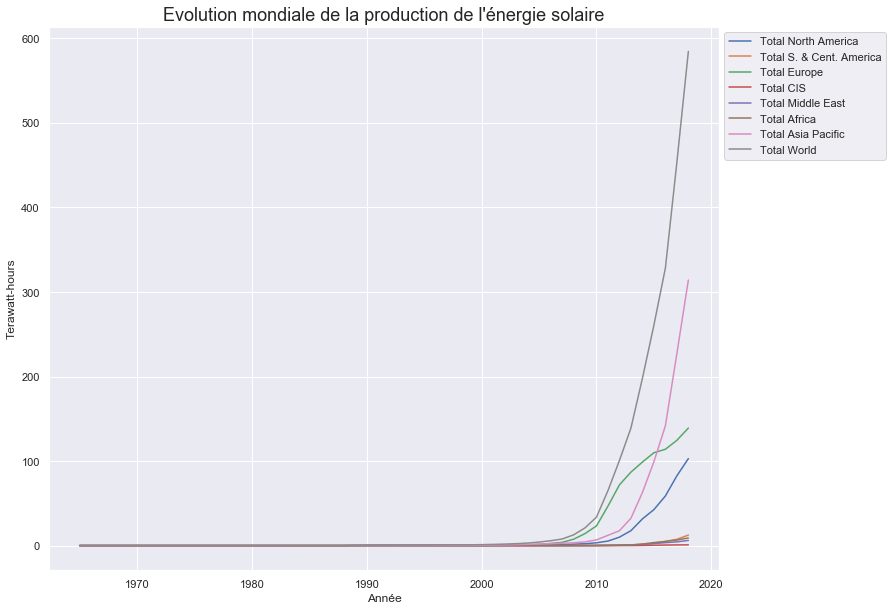

In [28]:
solar_production = pd.read_excel(dataPath+"data_production.xlsx", 12, header = 2)
unite = "Terawatt-hours"
solar_production = clean(solar_production,unite)
solar_production_total, solar_production = separate_total(solar_production, unite)
solar_production_total, solar_production = set_name_df(solar_production_total, "Total solar"), set_name_df(solar_production_total, "solar")
print_df(solar_production_total, "Evolution mondiale de la production de l'énergie solaire", unite)

### Vent :

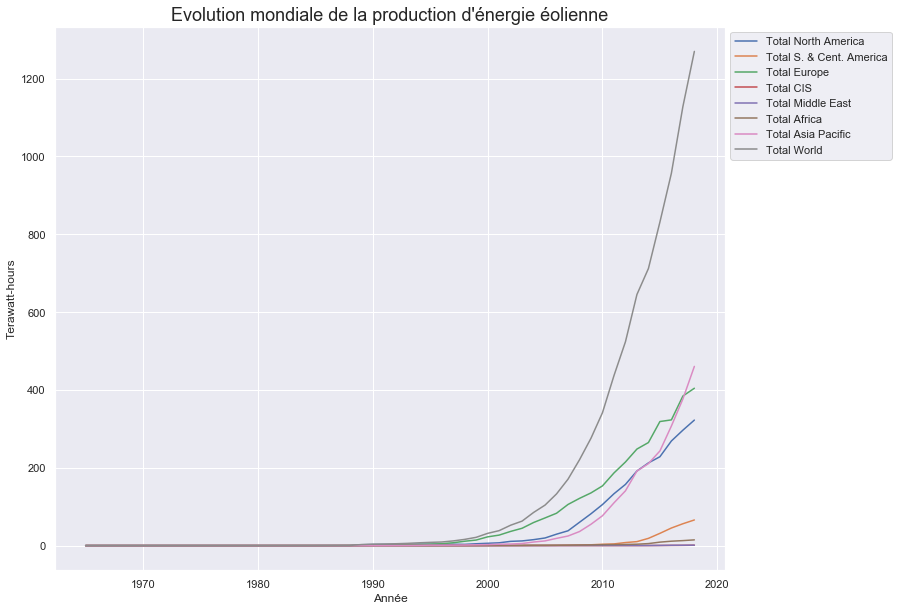

In [29]:
wind_production = pd.read_excel(dataPath+"data_production.xlsx", 13, header = 2)
unite = "Terawatt-hours"
wind_production = clean(wind_production,unite)
wind_production_total, wind_production = separate_total(wind_production, unite)
wind_production_total, wind_production = set_name_df(wind_production_total, "Total wind"), set_name_df(wind_production_total, "wind")

print_df(wind_production_total, "Evolution mondiale de la production d'énergie éolienne", unite)

### Biomass :

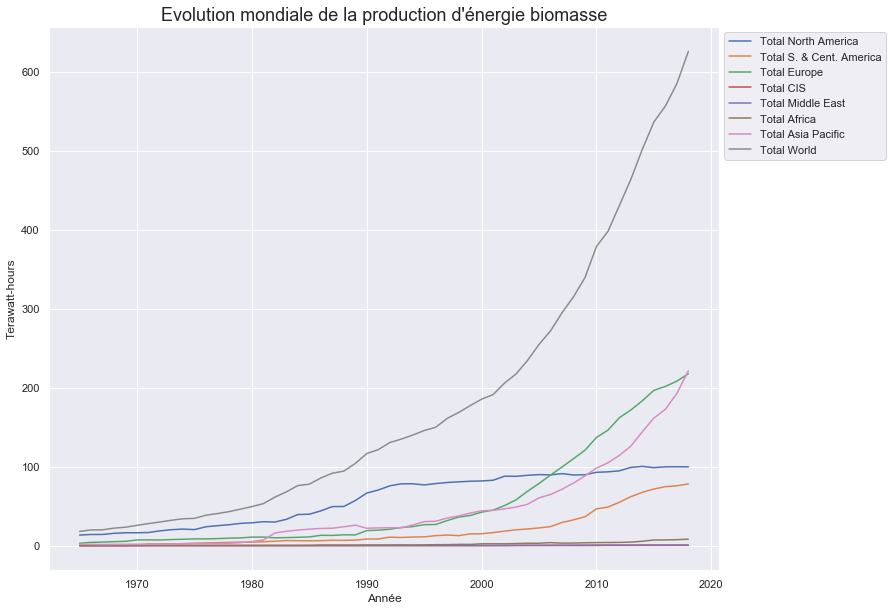

In [30]:
biomass_production = pd.read_excel(dataPath+"data_production.xlsx", 14, header = 2)
unite = "Terawatt-hours"
biomass_production = clean(biomass_production,unite)
biomass_production_total, biomass_production = separate_total(biomass_production, unite)
biomass_production_total, biomass_production = set_name_df(biomass_production_total, "Total biomass"), set_name_df(biomass_production_total, "biomass")
print_df(biomass_production_total, "Evolution mondiale de la production d'énergie biomasse", unite)


### Total :

In [31]:
def print_tot(list_df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,df in enumerate(list_df) :   
        plt.plot(df.columns.values[:-5], df.iloc[-1][:-5], label=f"{df.name}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()

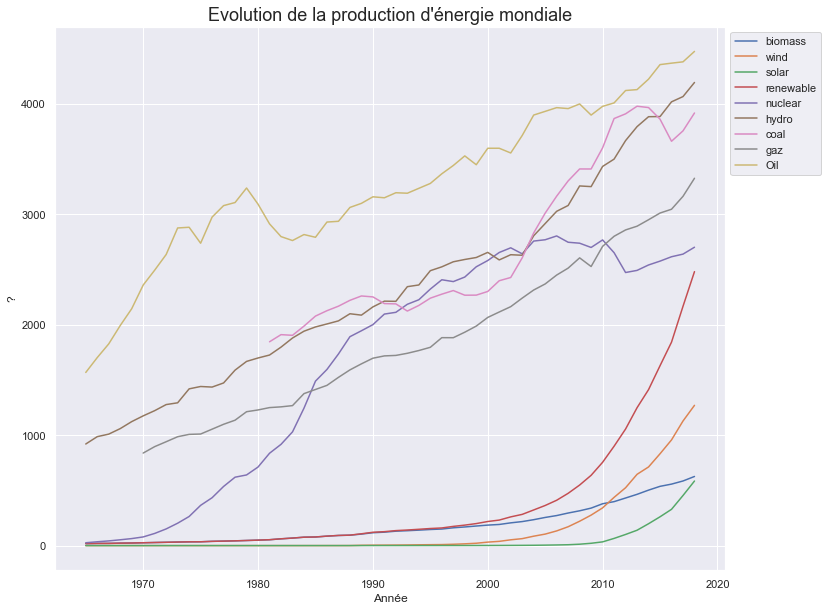

In [32]:
dfs= [biomass_production,wind_production,solar_production, renewable_production, 
           nuclear_production, hydro_production,coal_production, gaz_production, oil_production]
print_tot(dfs,
         title = "Evolution de la production d'énergie mondiale", unite="?")

On constate que les énergies fossiles sont en tête, poussés par la l'Asie (notamment la Chine), le début des années 2000 montre une croissance exponentielle des énergies renouvelables

In [33]:
dfs= [biomass_production_total,wind_production_total,solar_production_total, renewable_production_total, 
           nuclear_production_total, hydro_production_total,coal_production_total, gaz_production_total, oil_production_total]


In [34]:
min_date = min(coal_production.T.index.values[:-5].astype(int))

def reshape_data (df) :
    df_copy = df.copy()
    df_copy = df_copy.T
    df_copy = df_copy.reset_index()
    df_copy = df_copy [:-5]
    header = np.array(df_copy.columns)
    header[0] = 'Date'
    df_copy = df_copy[1:]
    df_copy.columns = header
    df_copy = df_copy.melt(id_vars=['Date'], value_name=df.name)
    df_copy = df_copy[df_copy["Date"]>min_date]
    df_copy.name = df.name
    return df_copy

def concat_sources (dfs) :
    dataframes = []
    for df in dfs : 
        dataframes.append(reshape_data(df))
    return_df = dataframes[0]
    for df in dataframes[1:] :
        return_df=return_df.merge(df, on=["Date", "variable"])
    return return_df

t =  concat_sources(dfs)
t_copy = t.copy()
t=t.melt(id_vars=['Date', 'variable'], var_name="Energy", value_name = "Production")
t.Production=t.Production.astype(float)
t.Date=t.Date.astype(int)

In [35]:
np.unique(t.variable.values)

array(['Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Europe',
       'Total Middle East', 'Total North America',
       'Total S. & Cent. America', 'Total World'], dtype=object)

In [36]:
t.variable = t.variable.str.replace("Total ","").str.replace('S. & Cent. America',"Latin America").str.replace("CIS", "Russia")


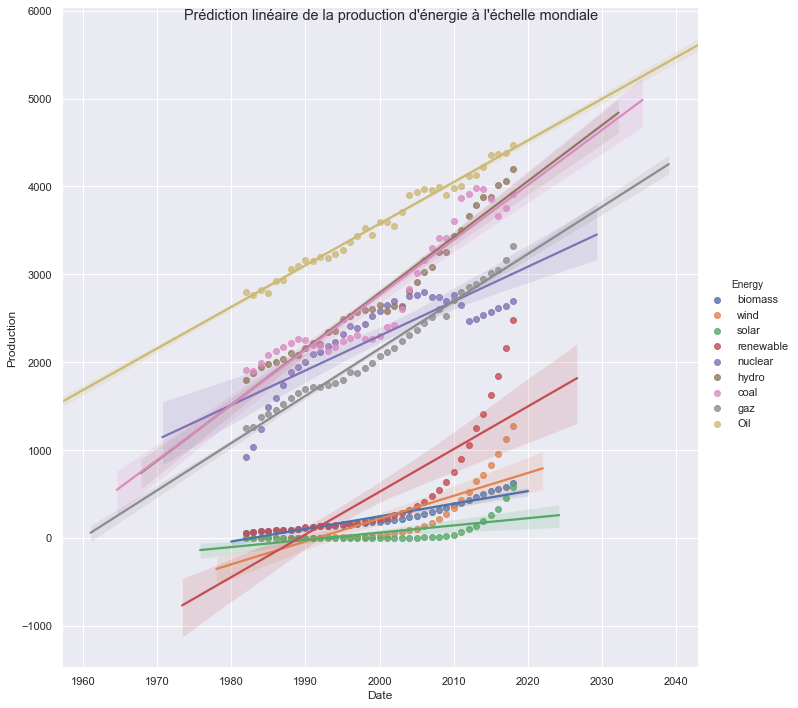

In [37]:
import seaborn as sns; sns.set(color_codes=True)
t_world=t[t["variable"]=="World"]
g = sns.lmplot(x="Date", y="Production", hue="Energy", data=t_world, height=10).fig.suptitle("Prédiction linéaire de la production d'énergie à l'échelle mondiale")


In [44]:
## Ajout des imports nécessaires
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Ajout code Jérémie
def predict(X_futur, final_df, region, energy, fig):
    europe_renewable = final_df[(final_df['Country'] == region) & (
        final_df['Energy'] == energy)].drop(columns=['Population Growth', 'CO2 Emission'])
    X_europe = europe_renewable['Date']
    y_europe = europe_renewable.drop(
        columns=['Date', 'Country', 'Energy', 'Production'])
    # Prediction des données démographiques futurs
    poly = PolynomialFeatures(2)
    X_poly = poly.fit_transform(X_europe.values.reshape(-1, 1))
    X_poly_futur = poly.fit_transform(X_futur.reshape(-1, 1))
    lr = LinearRegression().fit(X_poly, y_europe)
    y_predicted = lr.predict(X_poly_futur)
    X_futur_final = pd.DataFrame(X_futur, columns=['Date']).join(pd.DataFrame(y_predicted, columns=[
                          'Urban Population', 'Population', 'GDP in $']))
    y_train = europe_renewable['Production']
    X_train = europe_renewable.drop(
        columns=['Country', 'Energy', 'Production'])
    X_train['GDP per capita'] = X_train['GDP in $'] / X_train['Population']
    europe_renewable_present_futur = pd.concat([X_train, X_futur_final],sort=False)
    europe_renewable_present_futur['GDP per capita'] = europe_renewable_present_futur['GDP in $'] / \
        europe_renewable_present_futur['Population']
    europe_renewable_futur = X_futur_final.copy()
    europe_renewable_futur['GDP per capita'] = europe_renewable_futur['GDP in $'] / \
        europe_renewable_futur['Population']
    # Prédiction de la production futur
    poly2 = PolynomialFeatures(2)
    X_train_poly = poly2.fit_transform(X_train)
    X_test_poly = poly2.fit_transform(europe_renewable_futur)
    lr = LinearRegression().fit(X_train_poly, y_train)
    y_final = lr.predict(X_test_poly)
    prod = pd.concat([pd.DataFrame(y_train, columns=['Production']),
                     pd.DataFrame(y_final, columns=['Production'])],sort=False)
    final = europe_renewable_present_futur.join(prod)
    # Visualisation
    fig.add_trace(go.Scatter(x=final['Date'], y=final["Production"],name=energy))
X_futur=np.array(range(2019, 2050))
region='World'
energies=['Oil', 'biomass', 'coal', 'gaz', 'hydro',
    'nuclear', 'renewable', 'solar', 'wind']
fig=go.Figure()
fig.update_layout(title=f"Evolution de la production d'énergies dans la région {region}")
for energy in energies:
    predict(X_futur, final_df, region, energy,fig)
fig.show()

ValueError: Shape of passed values is (31, 4), indices imply (31, 3)